In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

showbags = pd.read_csv('showbags.csv', dtype={'name': str, 'price': np.float64, 'total_price': np.float64, 'distributor': str, 'has_voucher': bool})


# basic statistics on the showbag

<Axes: ylabel='distributor'>

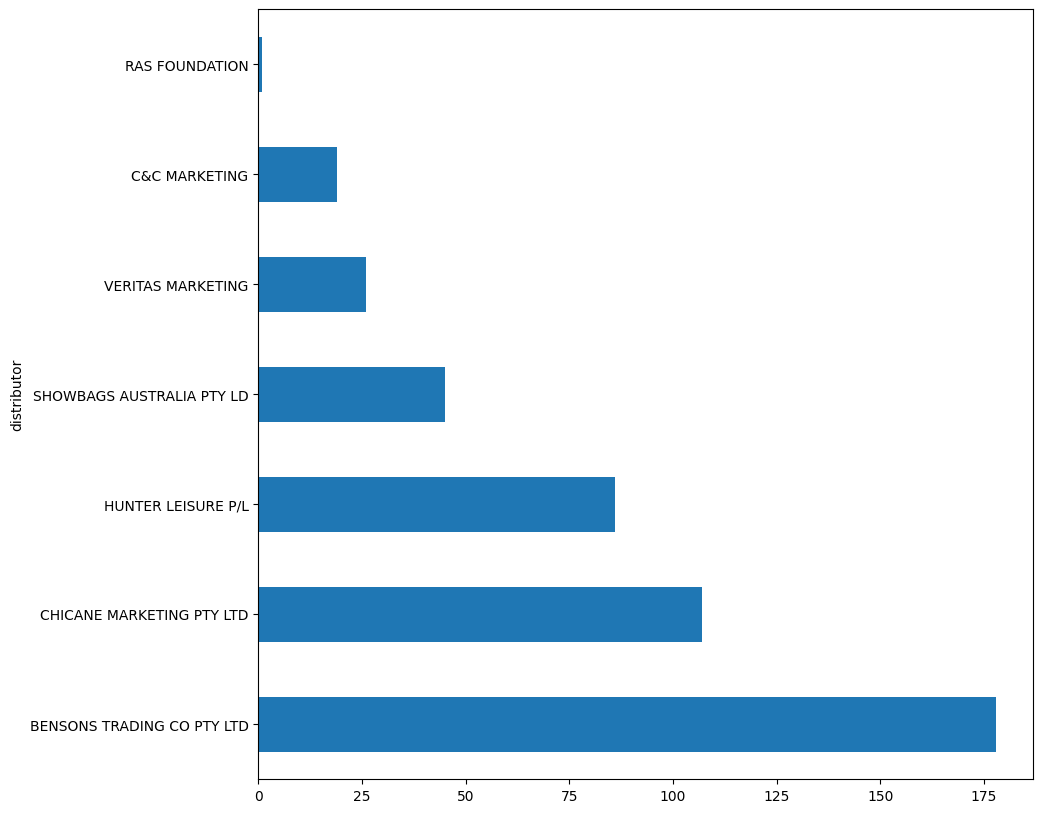

In [3]:
# count the number of showbags by distributor
showbags['distributor'].value_counts().plot(kind='barh', figsize=(10, 10))

In [4]:
# stats on the number of showbags by distributor
showbags['distributor'].value_counts().describe()

count      7.000000
mean      66.000000
std       62.048368
min        1.000000
25%       22.500000
50%       45.000000
75%       96.500000
max      178.000000
Name: count, dtype: float64

has_voucher
False    442
True      20
Name: count, dtype: int64

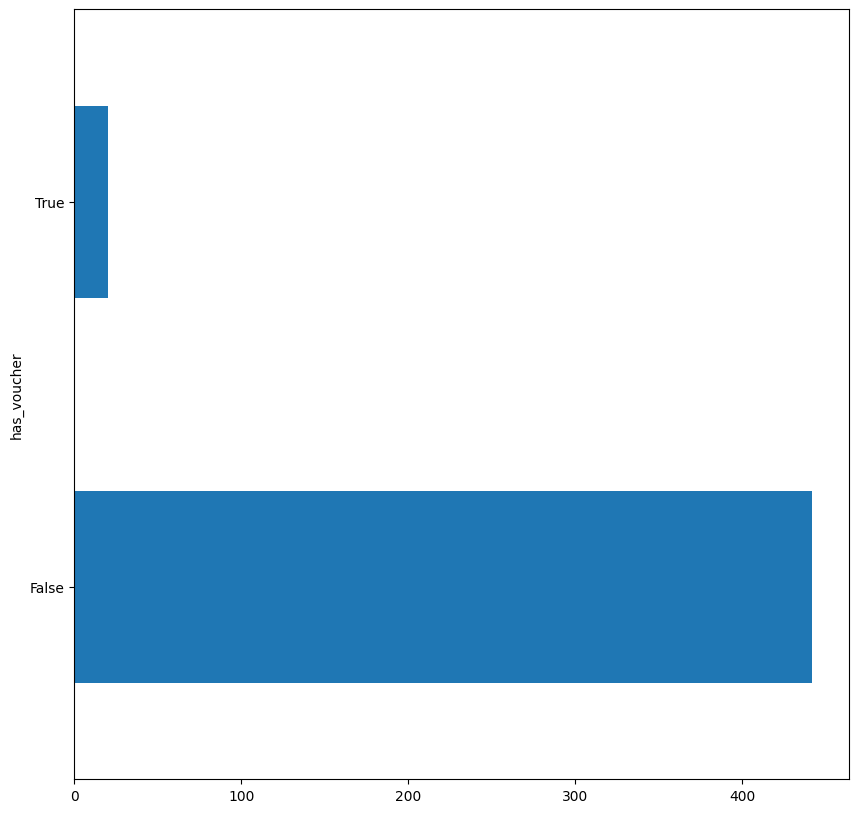

In [5]:
# display the number of showbags with and without a voucher
showbags['has_voucher'].value_counts().plot(kind='barh', figsize=(10, 10))
showbags['has_voucher'].value_counts()

In [6]:
print(showbags['price'].describe())
showbags['value_per_dollar'] = showbags['total_price'] / showbags['price']
print(showbags['value_per_dollar'].describe())

count    462.000000
mean      22.826840
std       10.282944
min        3.000000
25%       12.000000
50%       30.000000
75%       32.000000
max       35.000000
Name: price, dtype: float64
count    462.000000
mean       2.322119
std        2.011398
min        0.900000
25%        1.440000
50%        1.926562
75%        2.482509
max       22.300455
Name: value_per_dollar, dtype: float64


In [7]:
print(showbags['value_per_dollar'].describe())
# remove rows with voucher
print(showbags[showbags['has_voucher'] == False]['value_per_dollar'].describe())
print(showbags[showbags['has_voucher'] == False].count(), showbags.count())
# display the number of voucher per distributor
showbags[showbags['has_voucher'] == True]['distributor'].value_counts()


count    462.000000
mean       2.322119
std        2.011398
min        0.900000
25%        1.440000
50%        1.926562
75%        2.482509
max       22.300455
Name: value_per_dollar, dtype: float64
count    442.000000
mean       2.015489
std        0.831382
min        0.900000
25%        1.428571
50%        1.882321
75%        2.395000
max        9.900000
Name: value_per_dollar, dtype: float64
name                442
price               442
total_price         442
distributor         442
has_voucher         442
value_per_dollar    442
dtype: int64 name                462
price               462
total_price         462
distributor         462
has_voucher         462
value_per_dollar    462
dtype: int64


distributor
CHICANE MARKETING PTY LTD    10
C&C MARKETING                10
Name: count, dtype: int64

<Axes: >

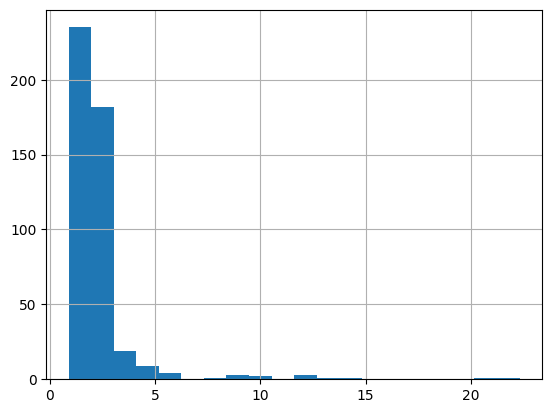

In [8]:
# graph the distribution of value per dollar
showbags['value_per_dollar'].hist(bins=20)


<Axes: >

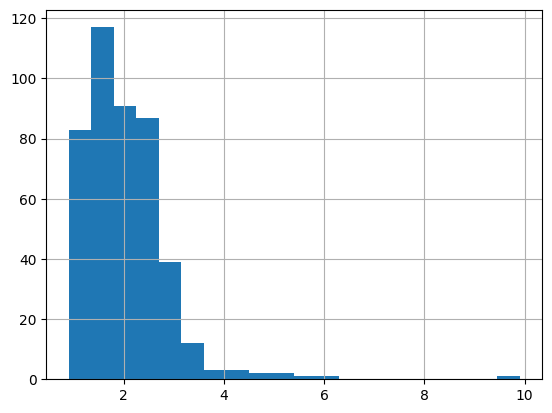

In [9]:
# Graph the value per dollar without vouchers
showbags[showbags['has_voucher'] == False]['value_per_dollar'].hist(bins=20)

<Axes: ylabel='value_per_dollar'>

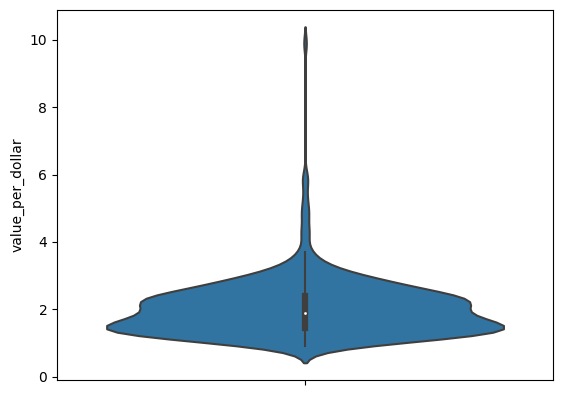

In [11]:
# do a violin plot of value per dollar by distributor
sns.violinplot( y='value_per_dollar', data=showbags[showbags['has_voucher'] == False])

<Axes: title={'center': 'value_per_dollar'}, xlabel='distributor'>

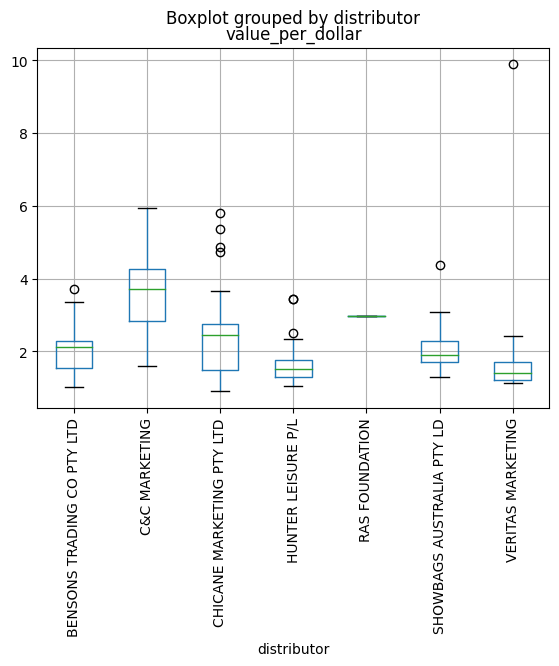

In [12]:
# box plot distribution of value per dollar by distributor without vouchers
showbags[showbags['has_voucher'] == False].boxplot(column='value_per_dollar', by='distributor', rot=90)

In [91]:
# filter by value per dollar over 4 sort by value per dollar and no voucher
good_price = showbags[showbags['value_per_dollar'] > 4]
no_voucher = good_price[good_price['has_voucher'] == False]
good_price.sort_values(by='value_per_dollar', ascending=False).head(10)

# showbags[showbags['value_per_dollar'] > 4 & showbags['has_voucher'] == False].sort_values(by='value_per_dollar', ascending=False)

,name,price,total_price,distributor,has_voucher,value_per_dollar
375,The Australian Women's Weekly,22.0,490.61,CHICANE MARKETING PTY LTD,True,22.300455
387,marie claire,30.0,605.62,CHICANE MARKETING PTY LTD,True,20.187333
100,Better Homes and Gardens,30.0,418.64,CHICANE MARKETING PTY LTD,True,13.954667
201,Stella Athletic (Autumn),32.0,433.48,CHICANE MARKETING PTY LTD,True,13.546250
254,Stella Athletic (Spring),35.0,433.48,CHICANE MARKETING PTY LTD,True,12.385143
456,Tasty,32.0,391.89,CHICANE MARKETING PTY LTD,True,12.246562
19,Men's Style,32.0,385.33,CHICANE MARKETING PTY LTD,True,12.041562
458,Rural Aid - For Our Mates In the Bush,18.0,180.63,C&C MARKETING,True,10.035000
428,Mega Showbag,30.0,297.00,VERITAS MARKETING,False,9.900000
74,Women's Health magazine,32.0,299.86,C&C MARKETING,True,9.370625


In [72]:
no_voucher.sort_values(by='value_per_dollar', ascending=False).head(10)

,name,price,total_price,distributor,has_voucher,value_per_dollar
429,Mega Showbag,30.0,297.00,VERITAS MARKETING,False,9.900000
460,Sasy N Savy - Australia's Vegan Organic Skincare,30.0,178.00,C&C MARKETING,False,5.933333
107,UCLA,32.0,185.48,CHICANE MARKETING PTY LTD,False,5.796250
329,Western Sydney Wanderers ($15 each or 2 for $20),15.0,80.49,CHICANE MARKETING PTY LTD,False,5.366000
157,Australis Cosmetics,28.0,141.55,C&C MARKETING,False,5.055357
219,Miss Coco,35.0,170.00,CHICANE MARKETING PTY LTD,False,4.857143
33,Sydney FC ($15 each or 2 for $20),15.0,70.78,CHICANE MARKETING PTY LTD,False,4.718667
324,Gag Magic,20.0,87.40,SHOWBAGS AUSTRALIA PTY LD,False,4.370000
24,K Zone magazine,20.0,85.39,C&C MARKETING,False,4.269500
25,LULU - one who is remarkable and wonderful,32.0,132.62,C&C MARKETING,False,4.144375
